In [167]:
import numpy as np # array function
import pandas as pd # for tabular


In [168]:
import warnings
warnings.filterwarnings('ignore') #ignore warning messages
from sklearn.preprocessing import MinMaxScaler #minmax for age
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score #metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as pplot
%matplotlib inline
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [169]:
orig_df = pd.read_csv('diabetes_data.csv') #importing dataset
#vewing the top 5 for the headings
orig_df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


> **Dealing with missing values**

In [170]:
# checking is there is any na value
orig_df.isna().sum() 

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [171]:
#viewing data information
orig_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

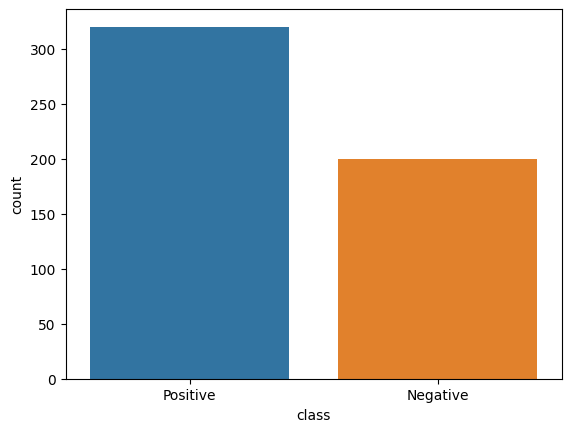

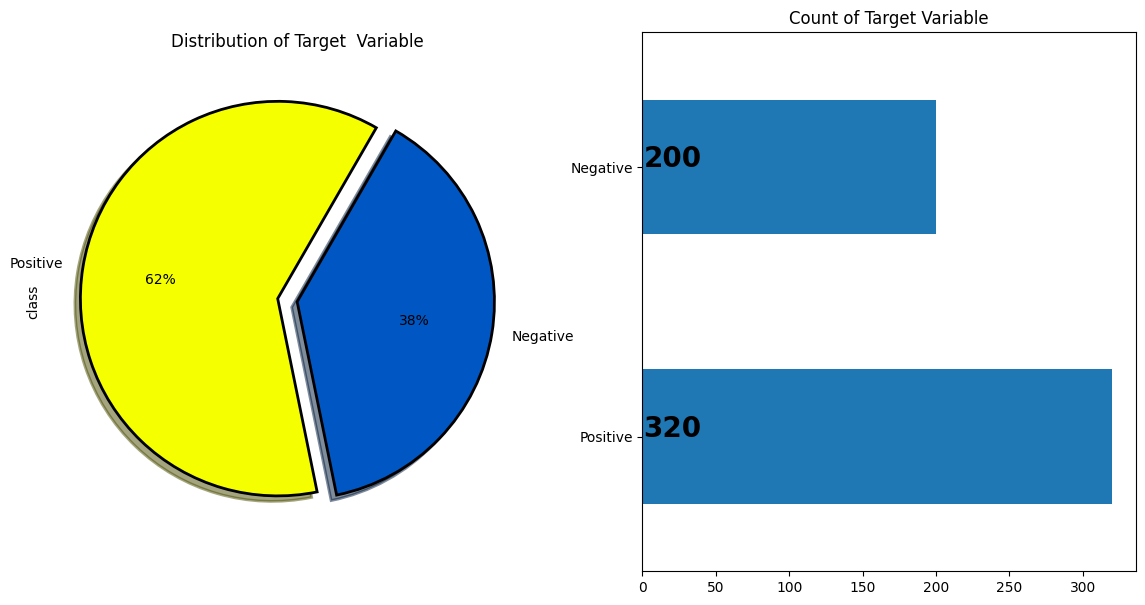

In [172]:
#distribution of target var
#countplor, x = class
sbn.countplot(x=orig_df['class'],data=orig_df)

# create pie chart and bar plot 
pplot.figure(figsize=(14,7))
pplot.subplot(121)
orig_df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sbn.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
pplot.title("Distribution of Target  Variable")

pplot.subplot(122)
ax = orig_df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(orig_df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

pplot.title("Count of Target Variable")
pplot.show()

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


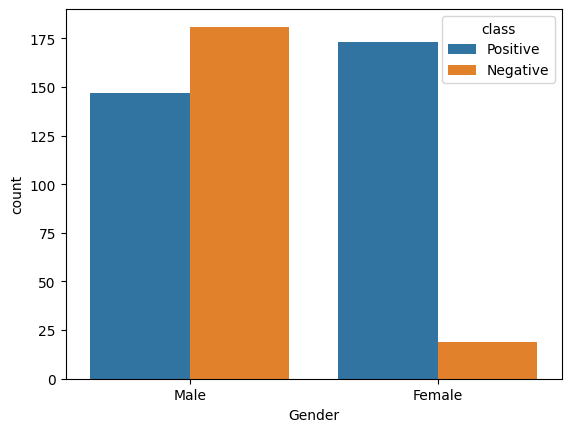

In [173]:
#distribution of gender
sbn.countplot(x=orig_df['Gender'],hue=orig_df['class'], data=orig_df)

plot_criteria= ['Gender', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


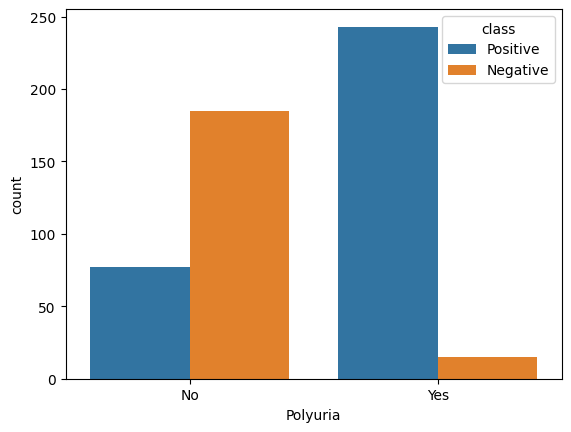

In [174]:
#distribution of polyuria
sbn.countplot(x=orig_df['Polyuria'],hue=orig_df['class'], data=orig_df)


plot_criteria= ['Polyuria', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


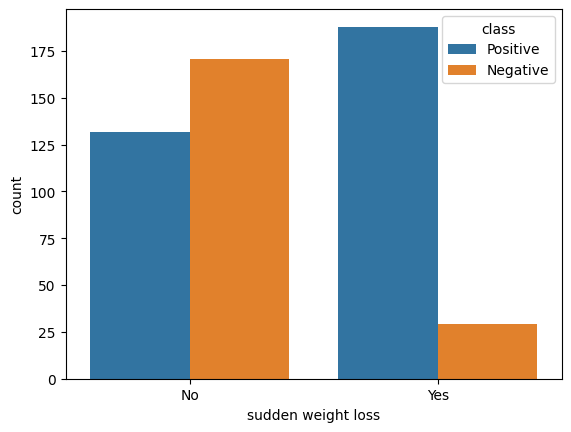

In [175]:
#distribution of sudden weight loss
sbn.countplot(x=orig_df['sudden weight loss'], hue = orig_df['class'], data = orig_df)
plot_criteria = ['sudden weight loss','class']
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


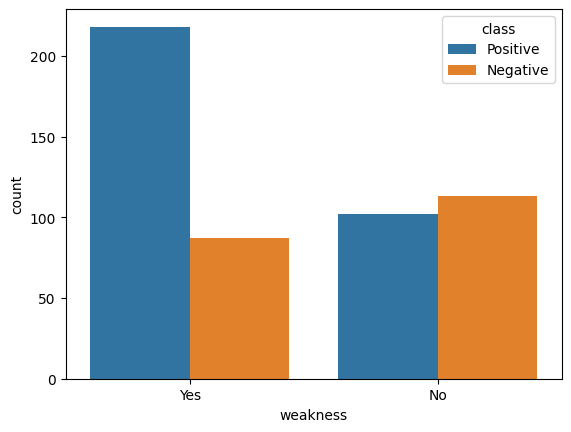

In [176]:
#distribution of weakness
sbn.countplot(x=orig_df['weakness'],hue=orig_df['class'], data=orig_df)


plot_criteria= ['weakness', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


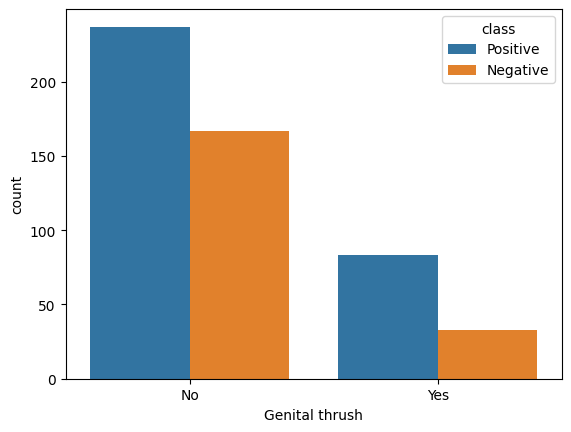

In [177]:
#distribution of genital thrush
sbn.countplot(x=orig_df['Genital thrush'],hue=orig_df['class'], data=orig_df)


plot_criteria= ['Genital thrush', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of visual blurring**

class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


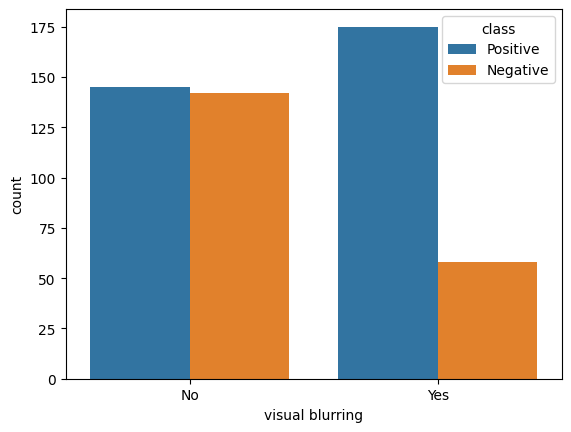

In [178]:
#distribution of bisual blurring
sbn.countplot(x=orig_df['visual blurring'],hue=orig_df['class'], data=orig_df)


plot_criteria= ['visual blurring', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


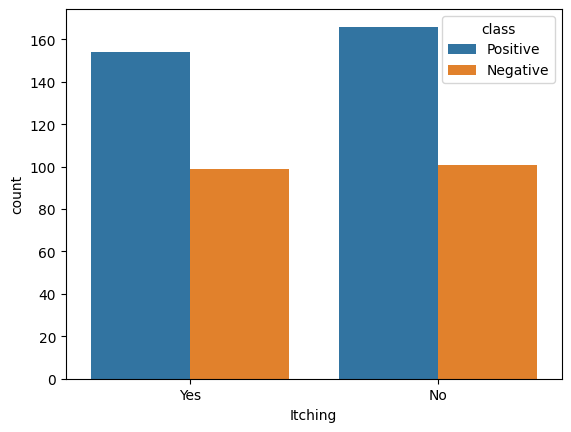

In [179]:
#distribution of itching
sbn.countplot(x=orig_df['Itching'],hue=orig_df['class'], data=orig_df)


plot_criteria= ['Itching', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


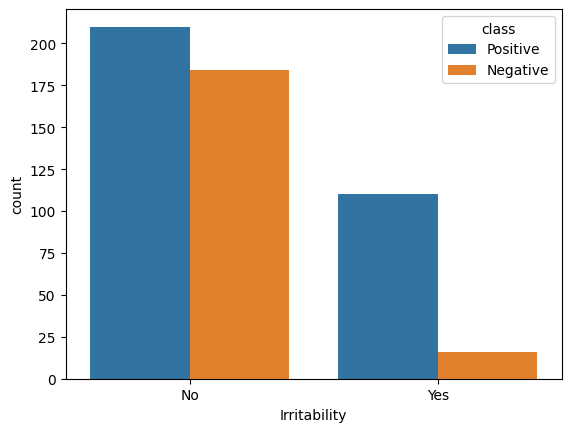

In [180]:
#distribution of irritability
sbn.countplot(x=orig_df['Irritability'],hue=orig_df['class'], data=orig_df)


plot_criteria= ['Irritability', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of delayed healing**

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


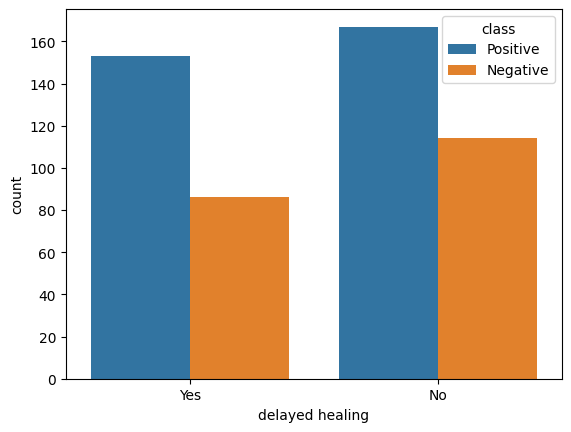

In [181]:
#distribution of delayed healing
sbn.countplot(x=orig_df['delayed healing'],hue=orig_df['class'], data=orig_df)


plot_criteria= ['delayed healing', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


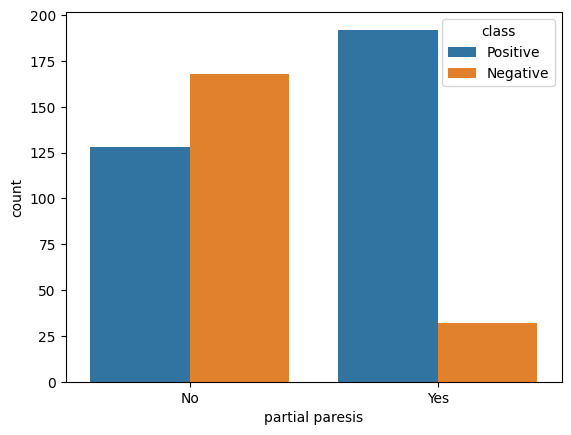

In [182]:
#distribution of partial paresis
sbn.countplot(x=orig_df['partial paresis'],hue=orig_df['class'], data=orig_df)


plot_criteria= ['partial paresis', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


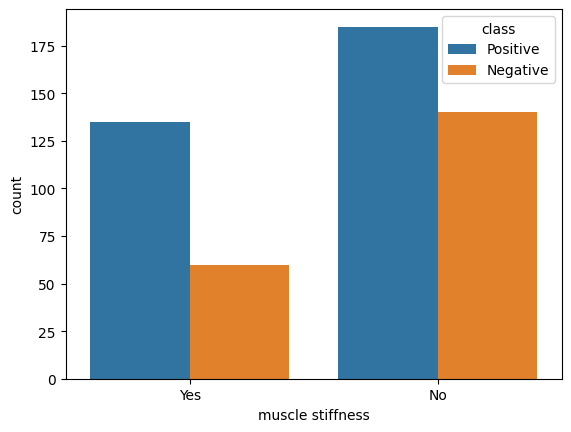

In [183]:
#distribution of muscle stiffness
sbn.countplot(x=orig_df['muscle stiffness'],hue=orig_df['class'], data=orig_df)


plot_criteria= ['muscle stiffness', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


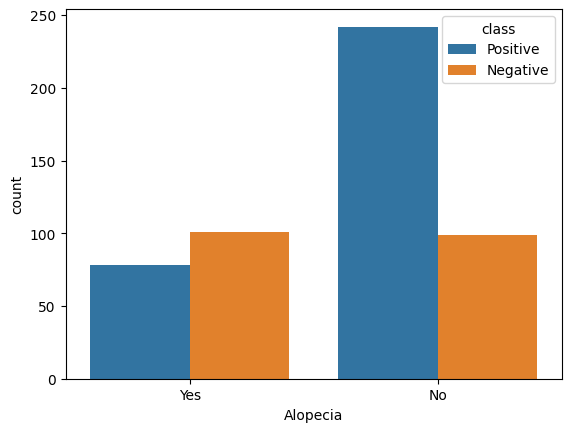

In [184]:
#distribution of alopecia
sbn.countplot(x=orig_df['Alopecia'],hue=orig_df['class'], data=orig_df)


plot_criteria= ['Alopecia', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


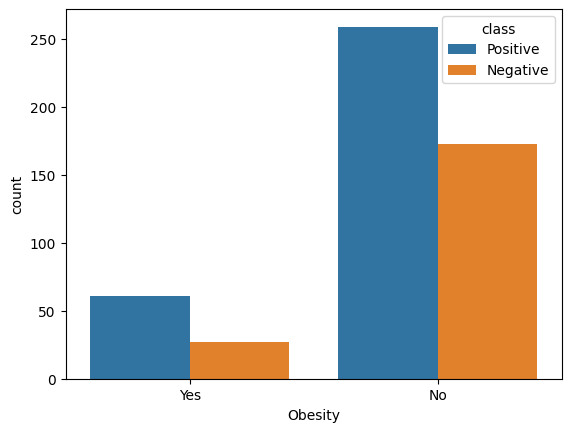

In [185]:
#distribution of obesity
sbn.countplot(x=orig_df['Obesity'],hue=orig_df['class'], data=orig_df)


plot_criteria= ['Obesity', 'class']
cm = sbn.light_palette("red", as_cmap=True)
(round(pd.crosstab(orig_df[plot_criteria[0]], orig_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

In [186]:
#data labeling -- changing negetive/positive into 0 1
orig_df['class'] = orig_df['class'].apply(lambda x: 0 if x=='Negative' else 1)
orig_df['class'].head(2)

0    1
1    1
Name: class, dtype: int64

In [187]:
#dropping the target var from the dataset
input = orig_df.drop(['class'], axis=1)
output = orig_df['class']

In [188]:
#storing features
objList = input.select_dtypes(include = "object").columns
print(objList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [189]:
#encoding label using sklearn library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    input[feat] = le.fit_transform(input[feature].astype(str))  

print (input.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


Here astype is used for casting the data type into int64

In [190]:
input.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [191]:
# finding corelation with features
input.corrwith(output)

Age                   0.108679
Gender                0.072173
Polyuria              0.072173
Polydipsia            0.072173
sudden weight loss    0.072173
weakness              0.072173
Polyphagia            0.072173
Genital thrush        0.072173
visual blurring       0.072173
Itching               0.072173
Irritability          0.072173
delayed healing       0.072173
partial paresis       0.072173
muscle stiffness      0.072173
Alopecia              0.072173
Obesity               0.072173
dtype: float64

<AxesSubplot: title={'center': 'Correlation with Diabetes'}>

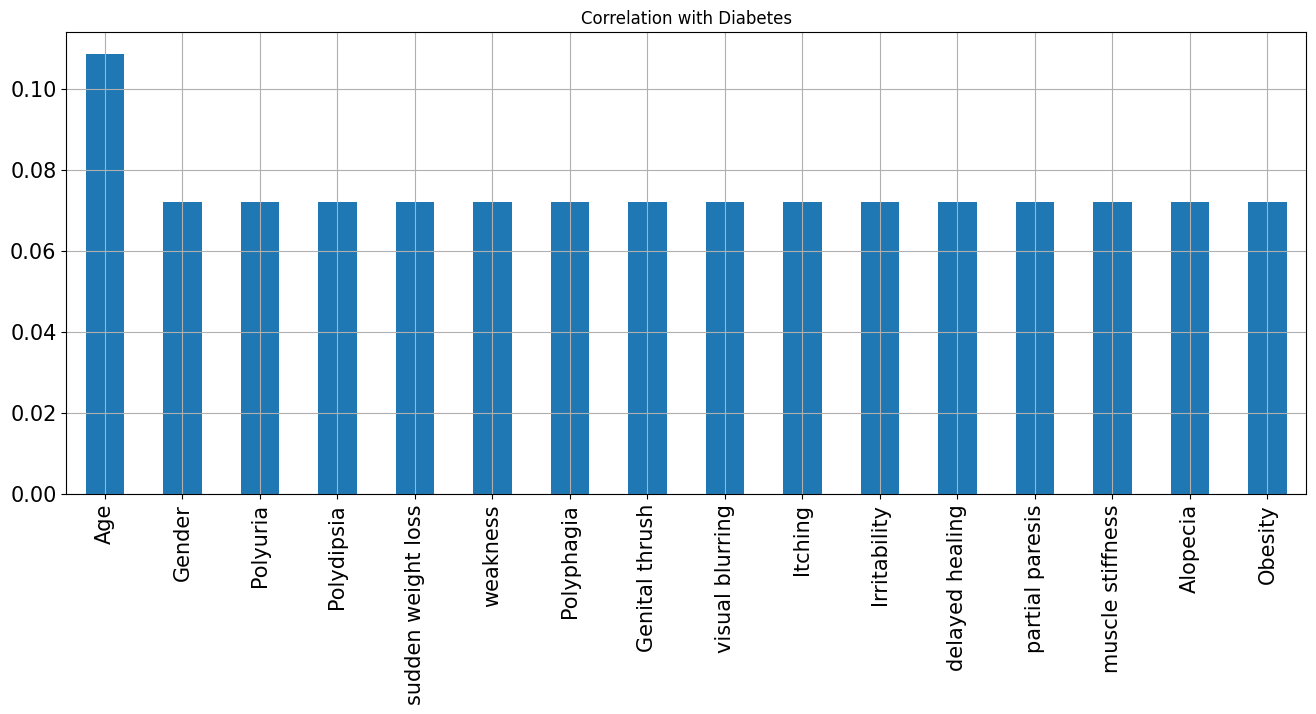

In [192]:
#corelation with respect to the output class
input.corrwith(output).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)


In [193]:
#showing input cols
input.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

Best alpha using builtin lassocv %f 0.015899459036461595
Best score using builtin lassocv 0.011804
Lasso picked 1variables and eliminated the other 15variables
Age                   0.004247
Gender                0.000000
Polyuria              0.000000
Polydipsia            0.000000
sudden weight loss    0.000000
weakness              0.000000
Polyphagia            0.000000
Genital thrush        0.000000
visual blurring       0.000000
Itching               0.000000
Irritability          0.000000
delayed healing       0.000000
partial paresis       0.000000
muscle stiffness      0.000000
Alopecia              0.000000
Obesity               0.000000
dtype: float64


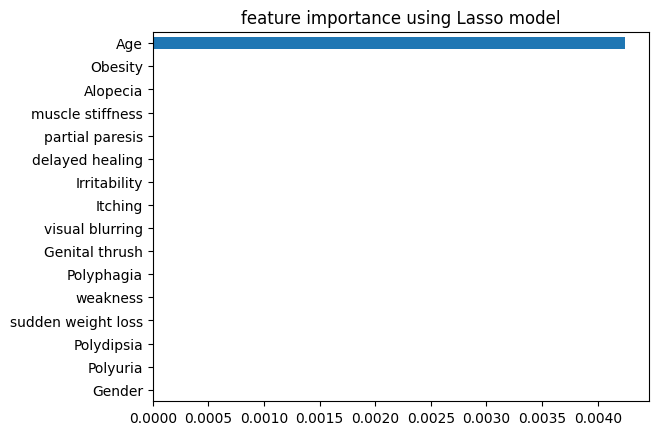

In [194]:
# feature selsction using lasso
from sklearn.linear_model import LassoCV
import matplotlib as matplotlib
reg = LassoCV()
reg.fit(input,output)
print("Best alpha using builtin lassocv %f" ,reg.alpha_)
print("Best score using builtin lassocv %f" %reg.score(input,output))
coef = pd.Series(reg.coef_,index=input.columns)
print("Lasso picked "+ str(sum(coef!=0))+ "variables and eliminated the other " + str(sum(coef==0)) + "variables" )
imp_coef = coef.sort_values()
# matplotlib.rcparams['figure.figsize'] =(8.0,10.0)
imp_coef.plot(kind="barh")
pplot.title("feature importance using Lasso model")
print(coef)


In [195]:
# dropping the least relevant feature
input_feature_selected = input = input.drop(['Alopecia'], axis=1)

In [196]:
input_feature_selected.shape[1]

15

In [197]:
#new input
input_feature_selected.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Obesity'],
      dtype='object')

In [226]:
l1 = list(df.columns)
l2 = list(input_feature_selected.columns)
print(l1)

['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


In [227]:
miss = []
for i in l1:
    if i not in l2:
        miss.append(i)
print(miss)

['Alopecia', 'class']


In [200]:
# splitting into test train 20/80
x_train, x_test, y_train,y_test = train_test_split(input_feature_selected,output, test_size = 0.2, stratify = output, random_state = 12345)

In [201]:
#normalize - -- age into 0-1
minmax = MinMaxScaler()
x_train[['Age']] = minmax.fit_transform(x_train[['Age']])
x_test[['Age']] = minmax.transform(x_test[['Age']])

In [202]:
#logistic regression
logic = LogisticRegression(random_state = 0,  penalty='l2')
logic.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [203]:
#kfold 
kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle = True)

acc_logis = cross_val_score(estimator=logic,X = x_train,y =y_train, cv = kfold,scoring='accuracy')

In [204]:
# Model Evaluation logistic regression
y_predict_logi = logic.predict(x_test)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logis.mean(), prec, rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.615385,0.615385,0.615385,1.0,0.761905,0.5


In [205]:
print(classification_report(y_predict_logi,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.76       104

    accuracy                           0.62       104
   macro avg       0.50      0.31      0.38       104
weighted avg       1.00      0.62      0.76       104



In [206]:

# random forest
rf = RandomForestClassifier(criterion='gini',n_estimators=100,)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [207]:
# preparing for k fold
kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle = True)

acc_rf = cross_val_score(estimator=rf
,X = x_train,y =y_train, cv = kfold,scoring='accuracy')

In [208]:
# Model Evaluation random forest

y_predict_r = rf.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_rf.mean(),prec,rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.615385,0.615385,0.615385,1.0000,0.761905,0.50000
1,Random Forest,0.740385,0.653846,0.722892,0.9375,0.816327,0.68125


In [209]:
print(classification_report(y_predict_r,y_test))

              precision    recall  f1-score   support

           0       0.42      0.81      0.56        21
           1       0.94      0.72      0.82        83

    accuracy                           0.74       104
   macro avg       0.68      0.77      0.69       104
weighted avg       0.83      0.74      0.76       104



In [210]:
#model svm
sv=SVC(kernel='linear',random_state=0)
sv.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [211]:
#prepping for kfold
kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle = True)

acc_sv = cross_val_score(estimator=sv,X = x_train,y =y_train, cv = kfold,scoring='accuracy')

In [212]:
# Model Evaluation svm
y_predict_svm = rf.predict(x_test)
roc=roc_auc_score(y_test, y_predict_svm)
acc = accuracy_score(y_test, y_predict_svm)
prec = precision_score(y_test, y_predict_svm)
rec = recall_score(y_test, y_predict_svm)
f1 = f1_score(y_test, y_predict_svm)

model_results = pd.DataFrame([['SVC',acc, acc_sv.mean(),prec,rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results.head()

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.615385,0.615385,0.615385,1.0000,0.761905,0.50000
1,Random Forest,0.740385,0.653846,0.722892,0.9375,0.816327,0.68125
2,SVC,0.740385,0.615385,0.722892,0.9375,0.816327,0.68125


In [213]:
print(classification_report(y_predict_svm,y_test))

              precision    recall  f1-score   support

           0       0.42      0.81      0.56        21
           1       0.94      0.72      0.82        83

    accuracy                           0.74       104
   macro avg       0.68      0.77      0.69       104
weighted avg       0.83      0.74      0.76       104



In [214]:
#model evaluation of KNN
scores = []
dic = {}
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i,metric='minkowski',p=2)  #minkowski and p = 2 ,euclidean distance
    knn.fit(x_train,y_train)
    predict = knn.predict(x_test)
    score = accuracy_score(predict, y_test)
    scores.append(round(100*score,2))

In [215]:
print(sorted(scores, reverse = True))

[74.04, 72.12, 71.15, 71.15, 70.19, 69.23, 68.27, 67.31, 66.35]


In [216]:
# Model Evaluation of Kneighbours
knn = KNeighborsClassifier(n_neighbors = 1,metric='minkowski',p=2)  #minkowski and p = 2 ,euclidean distance
knn.fit(x_train,y_train)
predict = knn.predict(x_test)
score = accuracy_score(predict, y_test)


prec = precision_score(y_test, predict)
rec = recall_score(y_test, predict)
f1 = f1_score(y_test, predict)


kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle = True)

acc_knn = cross_val_score(estimator=knn,X = x_train,y =y_train, cv = kfold,scoring='accuracy')


model_results = pd.DataFrame([['KNN',score, acc_knn.mean(),prec,rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.615385,0.615385,0.615385,1.0000,0.761905,0.50000
1,Random Forest,0.740385,0.653846,0.722892,0.9375,0.816327,0.68125
2,SVC,0.740385,0.615385,0.722892,0.9375,0.816327,0.68125
3,KNN,0.692308,0.625000,0.722222,0.8125,0.764706,0.68125


In [217]:
#naivebays gaussian nb
gb=GaussianNB()
gb.fit(x_train,y_train)


GaussianNB()

In [218]:
# kfold preparation
kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle = True)

acc_gb = cross_val_score(estimator=gb,X = x_train,y =y_train, cv = kfold,scoring='accuracy')

In [219]:
# Model Evaluation gb
y_predict_gb = gb.predict(x_test)
roc=roc_auc_score(y_test, y_predict_gb)
acc = accuracy_score(y_test, y_predict_gb)
prec = precision_score(y_test, y_predict_gb)
rec = recall_score(y_test, y_predict_gb)
f1 = f1_score(y_test, y_predict_gb)

model_results = pd.DataFrame([['GB',acc, acc_gb.mean(),prec,rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results.head()

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.615385,0.615385,0.615385,1.000000,0.761905,0.500000
1,Random Forest,0.740385,0.653846,0.722892,0.937500,0.816327,0.681250
2,SVC,0.740385,0.615385,0.722892,0.937500,0.816327,0.681250
3,KNN,0.692308,0.625000,0.722222,0.812500,0.764706,0.681250
4,GB,0.413462,0.459135,0.578947,0.171875,0.265060,0.485938


In [220]:
# exporting models into joblib files
import joblib
filename = "logic.joblib"
joblib.dump(logic, filename)
filename = "rf.joblib"
joblib.dump(rf, filename) # we will use this in the gui
filename = "sv.joblib"
joblib.dump(sv, filename)
filename = "knn.joblib"
joblib.dump(knn, filename)
filename = "gb.joblib"
joblib.dump(gb, filename)

['gb.joblib']